## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 3.เขียนโปรแกรมสำหรับสร้างตัวจำแนกกำลังสอง>
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจง
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# กำหนดพารามิเตอร์
mean1, mean2 = [2, 3], [6, 7]
cov1 = [[1, 0.2], [0.2, 1.5]]  # Covariance ของคลาส 1
cov2 = [[1.5, -0.3], [-0.3, 1]]  # Covariance ของคลาส 2

In [88]:
# สุ่มจุดสำหรับคลาส 1 และคลาส 2
np.random.seed(42)
samples_class1 = np.random.multivariate_normal(mean1, cov1, 100)
samples_class2 = np.random.multivariate_normal(mean2, cov2, 100)

# คำนวณค่าพารามิเตอร์จากตัวอย่าง
mean1_estimated = np.mean(samples_class1, axis=0)
mean2_estimated = np.mean(samples_class2, axis=0)
cov1_estimated = np.cov(samples_class1, rowvar=False)
cov2_estimated = np.cov(samples_class2, rowvar=False)

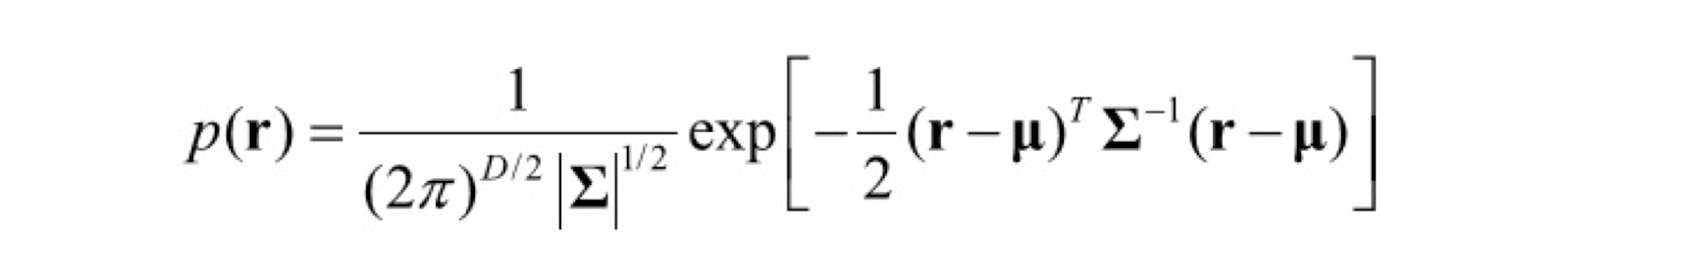

In [89]:
# ฟังก์ชัน Gaussian สำหรับ QDA
def gaussian_likelihood(x, mean, cov):
    size = len(mean)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det_cov))
    x_mu = x - mean
    # Einstein summation notation 
    result = np.einsum('...k,kl,...l->...', x_mu, inv_cov, x_mu)
    return norm_const * np.exp(-0.5 * result)

/var/folders/q9/w470hqp537v91j6ls4fskc3c0000gn/T/ipykernel_37776/3330758879.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, np.abs(posterior1_predefined - posterior2_predefined), levels=[0.5], colors='green', linestyles='--', label='Decision Boundary')
/var/folders/q9/w470hqp537v91j6ls4fskc3c0000gn/T/ipykernel_37776/3330758879.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/q9/w470hqp537v91j6ls4fskc3c0000gn/T/ipykernel_37776/3330758879.py:58: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, np.abs(posterior1_estimated - posterior2_estimated), levels=[0.5], colors='green', linestyles='--', label='Decision Boundary')
/var/folders/q9/w470hqp537v91j6ls4fskc3c0000gn/T/ipykernel_37776/3330758879.py:60: UserWarning: No artists with labels found to put in

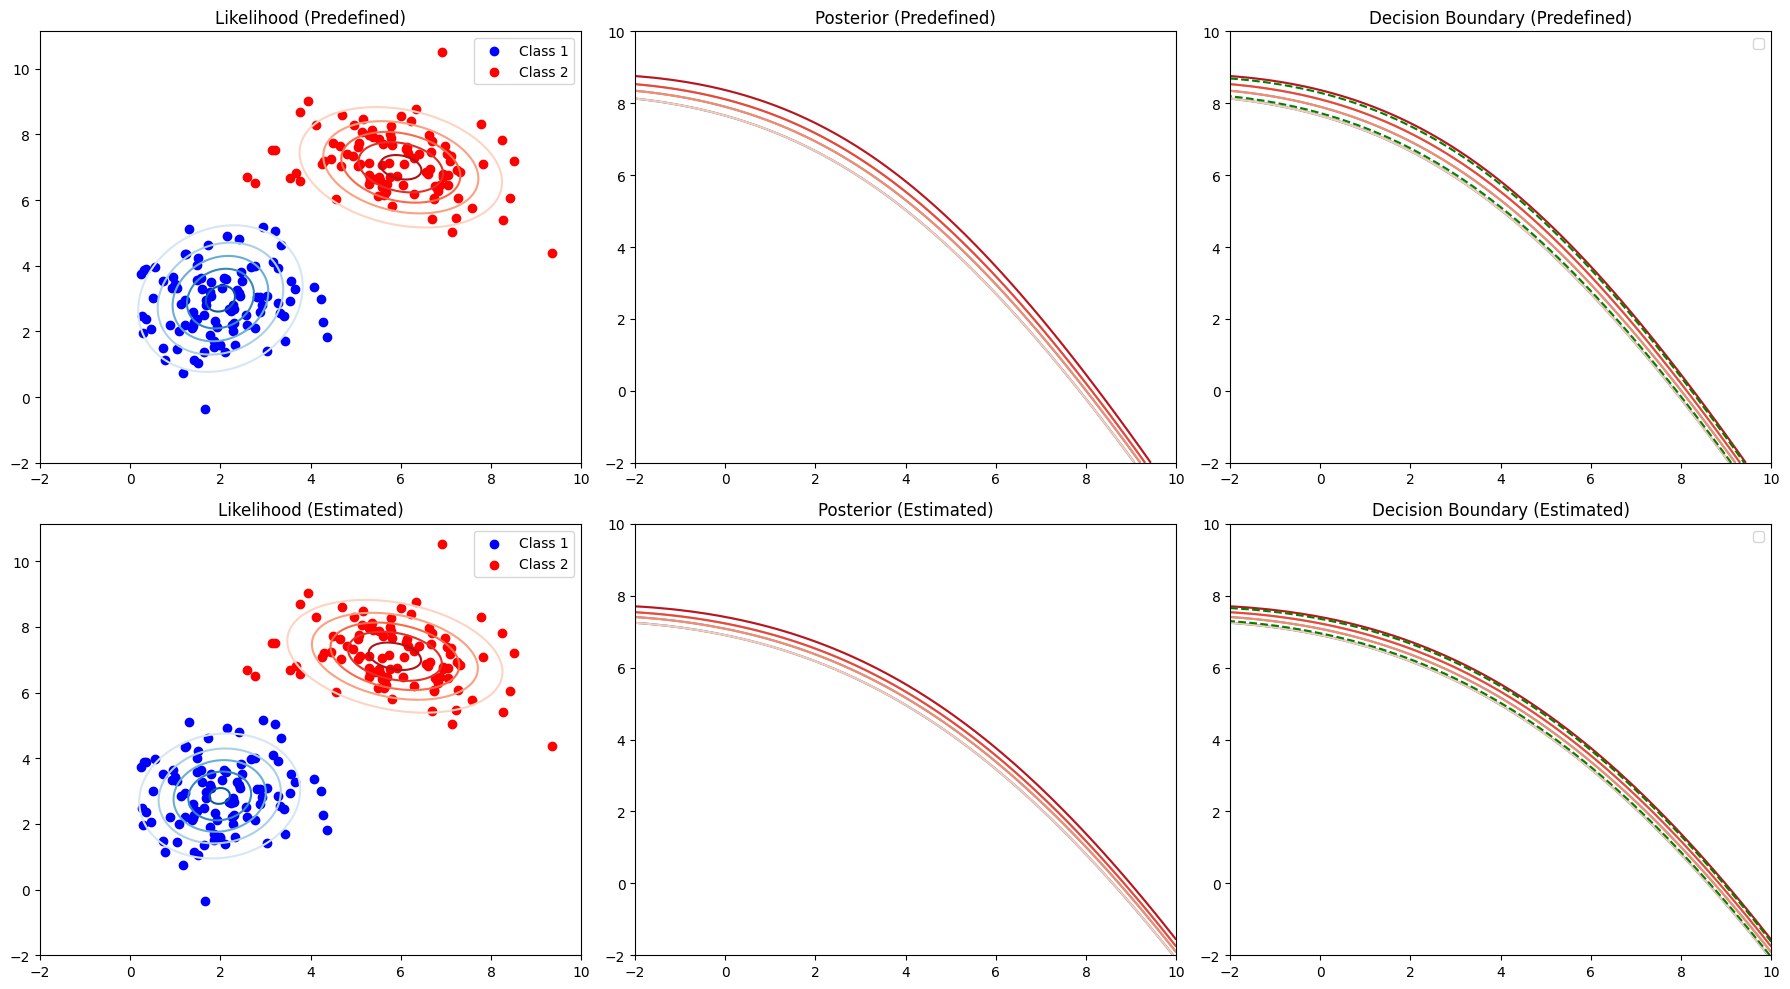

In [90]:
# สร้างกริดสำหรับพล็อตกราฟ
x, y = np.meshgrid(np.linspace(-2, 10, 200), np.linspace(-2, 10, 200))
pos = np.dstack((x, y))

# คำนวณ likelihood และ posterior สำหรับพารามิเตอร์ที่กำหนดไว้ล่วงหน้า
likelihood1_predefined = gaussian_likelihood(pos, mean1, cov1)
likelihood2_predefined = gaussian_likelihood(pos, mean2, cov2)
posterior1_predefined = likelihood1_predefined / (likelihood1_predefined + likelihood2_predefined)
posterior2_predefined = likelihood2_predefined / (likelihood1_predefined + likelihood2_predefined)

# คำนวณ likelihood และ posterior สำหรับพารามิเตอร์ที่คำนวณได้จากตัวอย่าง
likelihood1_estimated = gaussian_likelihood(pos, mean1_estimated, cov1_estimated)
likelihood2_estimated = gaussian_likelihood(pos, mean2_estimated, cov2_estimated)
posterior1_estimated = likelihood1_estimated / (likelihood1_estimated + likelihood2_estimated)
posterior2_estimated = likelihood2_estimated / (likelihood1_estimated + likelihood2_estimated)

# วาดกราฟ
plt.figure(figsize=(18, 10))

# กราฟสำหรับพารามิเตอร์ที่กำหนดไว้ล่วงหน้า
plt.subplot(2, 3, 1)
plt.contour(x, y, likelihood1_predefined, levels=5, cmap='Blues')
plt.contour(x, y, likelihood2_predefined, levels=5, cmap='Reds')
plt.scatter(samples_class1[:, 0], samples_class1[:, 1], c='blue', label='Class 1')
plt.scatter(samples_class2[:, 0], samples_class2[:, 1], c='red', label='Class 2')
plt.title('Likelihood (Predefined)')
plt.legend()

plt.subplot(2, 3, 2)
plt.contour(x, y, posterior1_predefined, levels=5, cmap='Blues')
plt.contour(x, y, posterior2_predefined, levels=5, cmap='Reds')
plt.title('Posterior (Predefined)')

plt.subplot(2, 3, 3)
plt.contour(x, y, posterior1_predefined, levels=5, cmap='Blues')
plt.contour(x, y, posterior2_predefined, levels=5, cmap='Reds')
plt.contour(x, y, np.abs(posterior1_predefined - posterior2_predefined), levels=[0.5], colors='green', linestyles='--', label='Decision Boundary')
plt.title('Decision Boundary (Predefined)')
plt.legend()

# กราฟสำหรับพารามิเตอร์ที่คำนวณได้จากตัวอย่าง
plt.subplot(2, 3, 4)
plt.contour(x, y, likelihood1_estimated, levels=5, cmap='Blues')
plt.contour(x, y, likelihood2_estimated, levels=5, cmap='Reds')
plt.scatter(samples_class1[:, 0], samples_class1[:, 1], c='blue', label='Class 1')
plt.scatter(samples_class2[:, 0], samples_class2[:, 1], c='red', label='Class 2')
plt.title('Likelihood (Estimated)')
plt.legend()

plt.subplot(2, 3, 5)
plt.contour(x, y, posterior1_estimated, levels=5, cmap='Blues')
plt.contour(x, y, posterior2_estimated, levels=5, cmap='Reds')
plt.title('Posterior (Estimated)')

plt.subplot(2, 3, 6)
plt.contour(x, y, posterior1_estimated, levels=5, cmap='Blues')
plt.contour(x, y, posterior2_estimated, levels=5, cmap='Reds')
plt.contour(x, y, np.abs(posterior1_estimated - posterior2_estimated), levels=[0.5], colors='green', linestyles='--', label='Decision Boundary')
plt.title('Decision Boundary (Estimated)')
plt.legend()

plt.tight_layout()
plt.show()